In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snc
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [4]:
# 1) Loading and Preprocessing 
# =====================================================

In [6]:
# Load the dataset
# ----------------
data=pd.read_csv("C:\\Users\\anshe\\CarPrice_Assignment.csv")

In [8]:
# Exploratory Data Analysis (EDA) 
# -----------------------------------

In [10]:
# Display the first few rows and information about the dataset
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [14]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [16]:
data.shape

(205, 26)

In [18]:
# Handle missing values
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [20]:
# Identify categorical and numerical features
categorical_features=data.select_dtypes(include=['object']).columns
numerical_features=data.select_dtypes(exclude=['object']).columns
# Separate the target variable
numerical_features=numerical_features.drop('price')

print("\nCategorical Features:", categorical_features)
print("Numerical Features:", numerical_features)


Categorical Features: Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')
Numerical Features: Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


In [22]:
# Encode categorical features using Label Encoding
label_encoders={}
for column in categorical_features:
    le=LabelEncoder()
    data[column]=le.fit_transform(data[column])
    label_encoders[column]=le

print("\nDataset after Label Encoding:")
print(data.head())
    


Dataset after Label Encoding:
   car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0       1          3        2         1           0           1        0   
1       2          3        3         1           0           1        0   
2       3          1        1         1           0           1        2   
3       4          2        4         1           0           0        3   
4       5          2        5         1           0           0        3   

   drivewheel  enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0           2               0       88.6  ...         130           5   
1           2               0       88.6  ...         130           5   
2           2               0       94.5  ...         152           5   
3           1               0       99.8  ...         109           5   
4           0               0       99.4  ...         136           5   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0

In [24]:
# Separate features (x) and target (y)
x=data.drop('price',axis=1)
y=data["price"]

In [26]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
# Scale numerical features using StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train[numerical_features])
x_test_scaled=scaler.fit_transform(x_test[numerical_features])

In [30]:
# Create DataFrames with scaled numerical features
x_train_scaled_df=pd.DataFrame(x_train_scaled,columns=numerical_features,index=x_train.index)
x_test_scaled_df=pd.DataFrame(x_test_scaled,columns=numerical_features,index=x_test.index)

In [32]:
# concatenate total trained and tested dataset
x_train_dataset=pd.concat([x_train_scaled_df,x_train[categorical_features]],axis=1)
x_test_dataset=pd.concat([x_test_scaled_df,x_test[categorical_features]],axis=1)

In [34]:
# Training and testing dataset
print("\n Training Data:")
print(x_train_dataset.head())
print("\nTesting Data:")
print(x_test_dataset.head())


 Training Data:
       car_ID  symboling  wheelbase  carlength  carwidth  carheight  \
66  -0.583435  -0.727380   1.037085   0.072450  0.083817   0.276779   
111  0.169582  -0.727380   1.541231   1.043916  1.170268   1.207269   
153  0.872397  -0.727380  -0.508962  -0.367616 -1.097108   2.178216   
96  -0.081424   0.078636  -0.710620  -0.732953 -1.002634   0.317235   
38  -1.051979  -0.727380  -0.374523  -0.550285 -0.341316  -0.168238   

     curbweight  enginesize  boreratio    stroke  ...  CarName  fueltype  \
66     0.281287    0.188010   0.405836  1.215101  ...       60         0   
111    1.016045   -0.158993   0.517384 -3.360166  ...       85         1   
153   -0.541642   -0.852999  -1.007108 -0.709667  ...      121         1   
96    -1.147082   -0.729070  -0.635281  0.110726  ...       76         1   
38    -0.524008   -0.406852  -0.635281  1.025779  ...       41         1   

     aspiration  doornumber  carbody  drivewheel  enginelocation  enginetype  \
66            0    

In [36]:
# 2)Model Implementation 
# =======================================================================

In [38]:
# Implement regression algorithms:
# 1) Linear Regression 2) Decision Tree Regressor 3) Random Forest Regressor 4) Gradient Boosting Regressor 5) Support Vector Regressor 

linear_rg=LinearRegression()
dec_tree=DecisionTreeRegressor(random_state=42)
rand_fore=RandomForestRegressor(random_state=42)
grad_boo=GradientBoostingRegressor(random_state=42)
svm=SVR()

# Train the models
linear_rg.fit(x_train_dataset,y_train)
dec_tree.fit(x_train_dataset,y_train)
rand_fore.fit(x_train_dataset,y_train)
grad_boo.fit(x_train_dataset,y_train)
svm.fit(x_train_dataset,y_train)

# Make predictions on the test set
y_pred_linear=linear_rg.predict(x_test_dataset)
y_pred_decision=dec_tree.predict(x_test_dataset)
y_pred_random=rand_fore.predict(x_test_dataset)
y_pred_gradboo=grad_boo.predict(x_test_dataset)
y_pred_svm=svm.predict(x_test_dataset)

In [40]:
# 3) Model Evaluation
# ========================================

In [42]:
# Evaluate the models
def evaluate(y_true,y_pred,model_name):
    r2=r2_score(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    print(f"--{model_name}--")
    print(f"r2_score ={r2:.4f}")
    print(f"mse={mse:.4f}")
    print(f"mae={mae:.4f}")
    return r2,mse,mae

results={}
results["Linear_regression"]=evaluate(y_test,y_pred_linear,"Linear Regression")
results["Decision_tree_regressor"]=evaluate(y_test,y_pred_decision,"Decision Tree regressor")
results["Random_Forest_regressor"]=evaluate(y_test,y_pred_random,"Random Forest Regressor")
results["Gradient_Boosting_Regressor"]=evaluate(y_test,y_pred_gradboo,"Gradient Boosting Regressor")
results["SVR"]=evaluate(y_test,y_pred_svm,"SVR")



--Linear Regression--
r2_score =0.8329
mse=13195086.5886
mae=2214.7072
--Decision Tree regressor--
r2_score =0.7493
mse=19790195.8744
mae=2820.2602
--Random Forest Regressor--
r2_score =0.8779
mse=9638452.7375
mae=2094.8907
--Gradient Boosting Regressor--
r2_score =0.9246
mse=5950098.9565
mae=1827.0295
--SVR--
r2_score =-0.1020
mse=86999716.6958
mae=5707.9516


In [44]:
# Identify the best performing model 
best_model=max(results,key=lambda k:results[k][0])
print(f"Best Performing Regression model (based on R2 value)is {best_model}")


Best Performing Regression model (based on R2 value)is Gradient_Boosting_Regressor


In [46]:
# Justification
print("Based on these 5 regression models,'Gradient Boosting Regressor' model gives high R2 value (It has the highest R² (0.9246), indicating that it explains a large portion of the variance in the data.),\nlow mean squared value and low mean absolute error value (meaning its predictions are, on average, closer to the actual values with the least error.)")
print("\nSVR performs poorly across all metrics, with a negative R² and very high MSE and MAE.")
print("Linear Regression, Decision Tree Regressor, and Random Forest Regressor perform reasonably well, but are outperformed by Gradient Boosting Regressor.")

Based on these 5 regression models,'Gradient Boosting Regressor' model gives high R2 value (It has the highest R² (0.9246), indicating that it explains a large portion of the variance in the data.),
low mean squared value and low mean absolute error value (meaning its predictions are, on average, closer to the actual values with the least error.)

SVR performs poorly across all metrics, with a negative R² and very high MSE and MAE.
Linear Regression, Decision Tree Regressor, and Random Forest Regressor perform reasonably well, but are outperformed by Gradient Boosting Regressor.


In [48]:
# 4) Feature Importance Analysis 
# =====================================================


Feature Importance from Gradient_Boosting_Regressor:
             Feature  Importance
7         enginesize    0.597661
6         curbweight    0.157473
11        horsepower    0.074198
14        highwaympg    0.063978
0             car_ID    0.019915
2          wheelbase    0.015520
3          carlength    0.013195
4           carwidth    0.011191
24        fuelsystem    0.008174
13           citympg    0.007689
20        drivewheel    0.007665
15           CarName    0.005894
19           carbody    0.004662
9             stroke    0.003507
10  compressionratio    0.003030
12           peakrpm    0.001854
8          boreratio    0.001584
5          carheight    0.001235
22        enginetype    0.000656
1          symboling    0.000505
17        aspiration    0.000407
18        doornumber    0.000006
16          fueltype    0.000000
21    enginelocation    0.000000
23    cylindernumber    0.000000


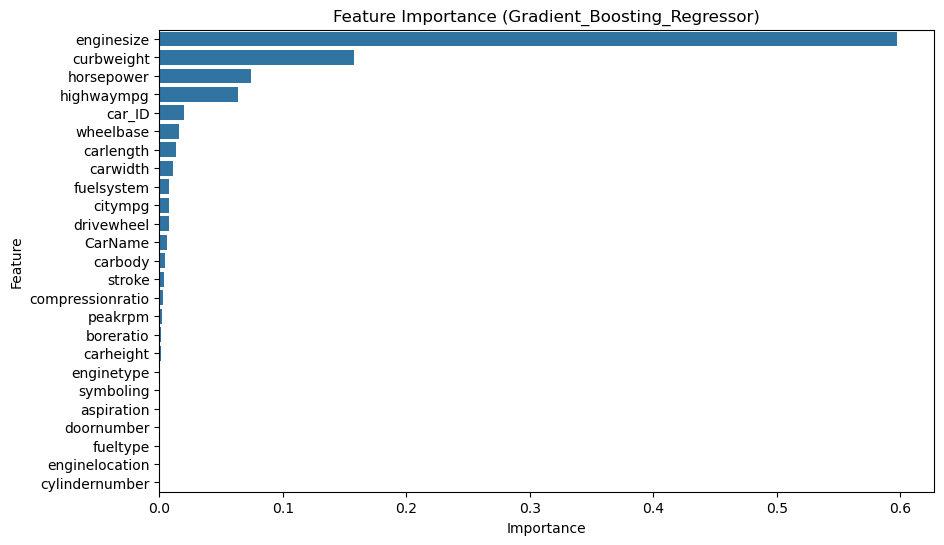

In [50]:
best_regressor = grad_boo 
importances = best_regressor.feature_importances_
feature_names = x_train_dataset.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(f"\nFeature Importance from {best_model}:")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
snc.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title(f'Feature Importance ({best_model})')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [52]:
# 5)Hyperparameter Tuning
# ========================================================

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
R-squared (Best Model): 0.9243
MSE (Best Model): 5972201.5247
MAE (Best Model): 1800.0000
--Original Gradient Boosting Regressor--
r2_score =0.9246
mse=5950098.9565
mae=1827.0295

Comparison with Original Model:
Original R-squared: 0.9246
Original MSE: 5950098.9565
Original MAE: 1827.0295

Feature Importance from Best Gradient Boosting Regressor:
             Feature  Importance
7         enginesize    0.596845
6         curbweight    0.160447
11        horsepower    0.072269
14        highwaympg    0.056819
0             car_ID    0.019819
3          carlength    0.014841
2          wheelbase    0.012985
13           citympg    0.009965
4           carwidth    0.009534
15           CarName    0.008338
24        fuelsystem    0.008167
10  compressionratio    0.008003
20        drivewheel    0.006289
19           carbody    0.005762
12           peakrpm    0.

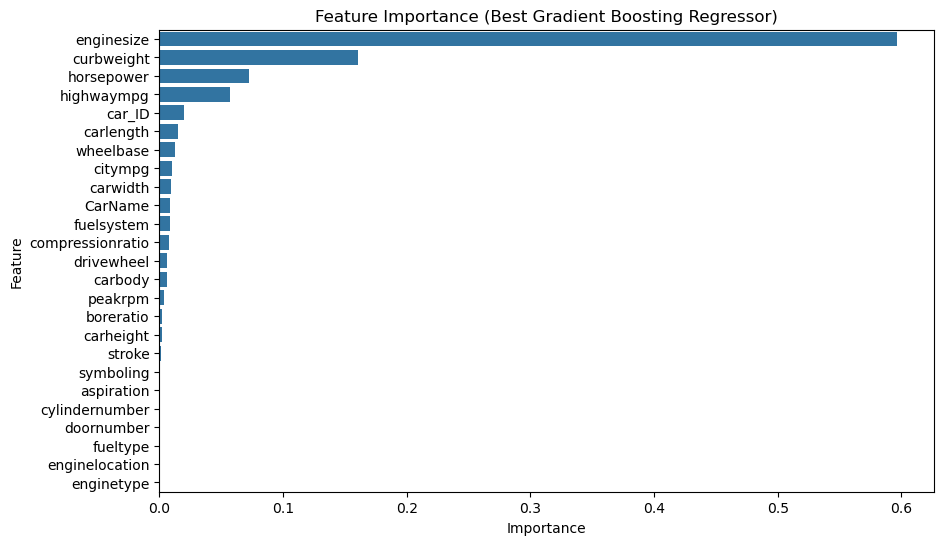

In [54]:
#  Define the parameter grid


param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4],  # Reduced max_depth
    'min_samples_split': [5, 10],  # Increased min_samples_split
    'min_samples_leaf': [2, 3], # Increased min_samples_leaf
    
}

#  Create the Gradient Boosting Regressor model
grad_boo = GradientBoostingRegressor()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=grad_boo,
                           param_grid=param_grid,
                           scoring='r2', 
                           cv=5,  
                           n_jobs=-1) 

# Perform the grid search on the training data
grid_search.fit(x_train_dataset, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_gbr = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred_best = best_gbr.predict(x_test_dataset)
r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

# Print the results
print("Best Hyperparameters:", best_params)
print(f"R-squared (Best Model): {r2_best:.4f}")
print(f"MSE (Best Model): {mse_best:.4f}")
print(f"MAE (Best Model): {mae_best:.4f}")

original_r2_gb, original_mse_gb, original_mae_gb = evaluate(y_test, y_pred_gradboo, "Original Gradient Boosting Regressor")

# Compare with the original model
print("\nComparison with Original Model:")
print(f"Original R-squared: {original_r2_gb:.4f}") 
print(f"Original MSE: {original_mse_gb:.4f}")
print(f"Original MAE: {original_mae_gb:.4f}")

# Feature Importance using best gbr
importances = best_gbr.feature_importances_
feature_names = x_train_dataset.columns  # Use the correct feature names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(f"\nFeature Importance from Best Gradient Boosting Regressor:")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
snc.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title(f'Feature Importance (Best Gradient Boosting Regressor)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()